In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Метод наименьших квадратов. Линейная регрессия

Задача анализа зашумленного набора данных $\{x_i, y_i\}, i=\overline{1,N}$ и поиск параметров линейной функции $y = kx + b$, оптимально описывающей зависимость между переменными.
"Оптимальная" зависимость должна быть максимальна близка ко всем данным точкам $\{x_i, y_i\}$, поэтому поставим задачу наименьших квадратов:
$$
\min \sum_{i=1}^N (y_i - k x_i - b)^2
$$
Нам надо найти способ определения оптимальных коэффициентов. Это можно сделать несколькими способами.

Зададим исходный набор данных.

In [26]:
N = 50
x = np.arange(N)
y = 3 * x - 10 + 5 * np.random.normal(scale=10, size=N)

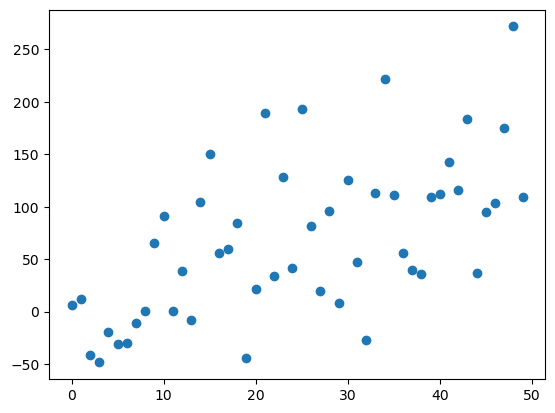

In [27]:
plt.scatter(x, y)

### Матричный подход

МНК для любых полиномов -- задача линейная, так как нам нужно найти коэффициенты при $x^n$, которые входят в полином линейно. То есть задачу можно представить в виде системы линейных уравнений:
$$
A \left(
\begin{array}{c}
k \\
b
\end{array}
\right) = y
$$
Сформируем матрицу $A$ для такой системы. У нас есть набор $N$ пар значений $\{x_i, y_i\}$ и два неизвестных коэффициента $k, b$, причем $y_i = x_i \cdot k + 1 \cdot b$. Тогда
$$
A = \left(\begin{array}{cc}
x_0 & 1 \\
x_1 & 1 \\
. & . \\
. & . \\
x_N & 1
\end{array}\right)
$$

In [28]:
A = np.vstack((x, np.ones_like(x))).T

Матрица $A$ неквадратная, и число строк больше числа столбцов, значит система переопределена. Такие системы решаются с помощью псевдообратной матрицы (а также другими способами) $A^+=(A^TA)^{-1}A^T$. В `numpy` есть модуль `linalg` для операций с матрицами, в котором есть функция псевдообращения `pinv`.

In [15]:
%timeit A_pinv_direct = np.linalg.inv(A.T.dot(A)).dot(A.T)
%timeit A_pinv_np = np.linalg.pinv(A)

10.5 µs ± 523 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
48.7 µs ± 1.32 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Сравним результаты вычисления псевдообратной матрицы по явной формуле и по библиотечной:

In [16]:
np.allclose(A_pinv_direct, A_pinv_np)

True

Решение системы записывается очевидным образом: 
$$
\left(
\begin{array}{c}
k \\
b
\end{array}
\right) = A^+y
$$

In [17]:
A_pinv_direct.dot(y)

array([  2.9523108 , -10.00050641])

Также для решения задачи можно воспользоваться библиотечной функцией `np.linalg.lstsq`

In [29]:
k, b = np.linalg.lstsq(A, y, rcond=None)[0]
print(k, b)

3.0775624349112354 -6.798712920692242


Выведем результаты вычислений на график

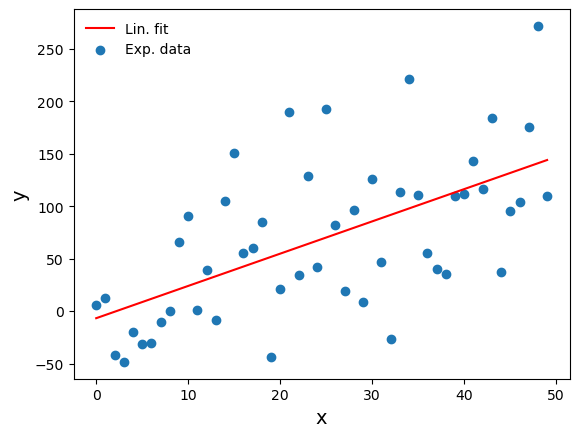

In [30]:
plt.scatter(x, y, label='Exp. data')
plt.plot(x, k * x + b, color='r', label='Lin. fit')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14, rotation=90)
plt.legend(frameon=0)

### Статистический подход

$x, y$ -- случайные величины с конечным средним и нормально распределенными ошибками (чем больше отклонение от среднего, тем меньше вероятность его получить):
$$
P(\Delta x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{\Delta x^2}{2\sigma^2}}
$$



Введем величины, которые называют выборочными средними:
$$
\overline{x} = \frac{1}{N}\sum_{i=1}^N x_i
$$
Выборочное среднее характеризует геометрический центр точек на координатной оси, соответствующей значениям случайной величины. Тогда можно показать, что
$$
k = \frac{\sum_{i=1}^N(x_i-\overline{x})(y_i-\overline{y})}{\sum_{i=1}^N(x_i-\overline{x})^2}, b = \overline{y} - k \overline{x}
$$

In [34]:
# %%timeit
x_avg = x.mean()
y_avg = y.mean()
k = np.sum((x - x_avg) * (y - y_avg)) / np.sum((x - x_avg) ** 2)
b = y_avg - k * x_avg
print(k, b)

3.0775624349112345 -6.798712920692225


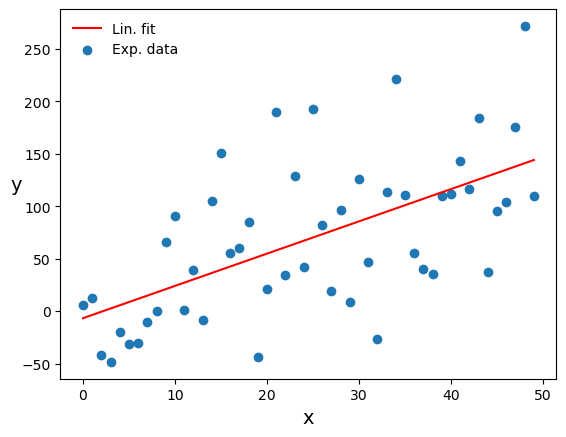

In [37]:
plt.scatter(x, y, label='Exp. data')
plt.plot(x, k * x + b, color='r', label='Lin. fit')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14, rotation=0)
plt.legend(frameon=0)